# Boston Housing

<img src="download.jpg" height=100px width=500px></img>

## Problem Statement:


The dataset that we made use of here, is "Boston" dataset.This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. The dataset is small in size with only 506 cases. It has two prototasks: nox, in which the nitrous oxide level is to be predicted; and price, in which the median value of a home is to be predicted.

In this problem, we are trying to predict the rate of the house if it has some particular attributes.

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

### Reading csv file

In [2]:
data=pd.read_csv('BostonHousing.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head(100)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [6]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Visualization

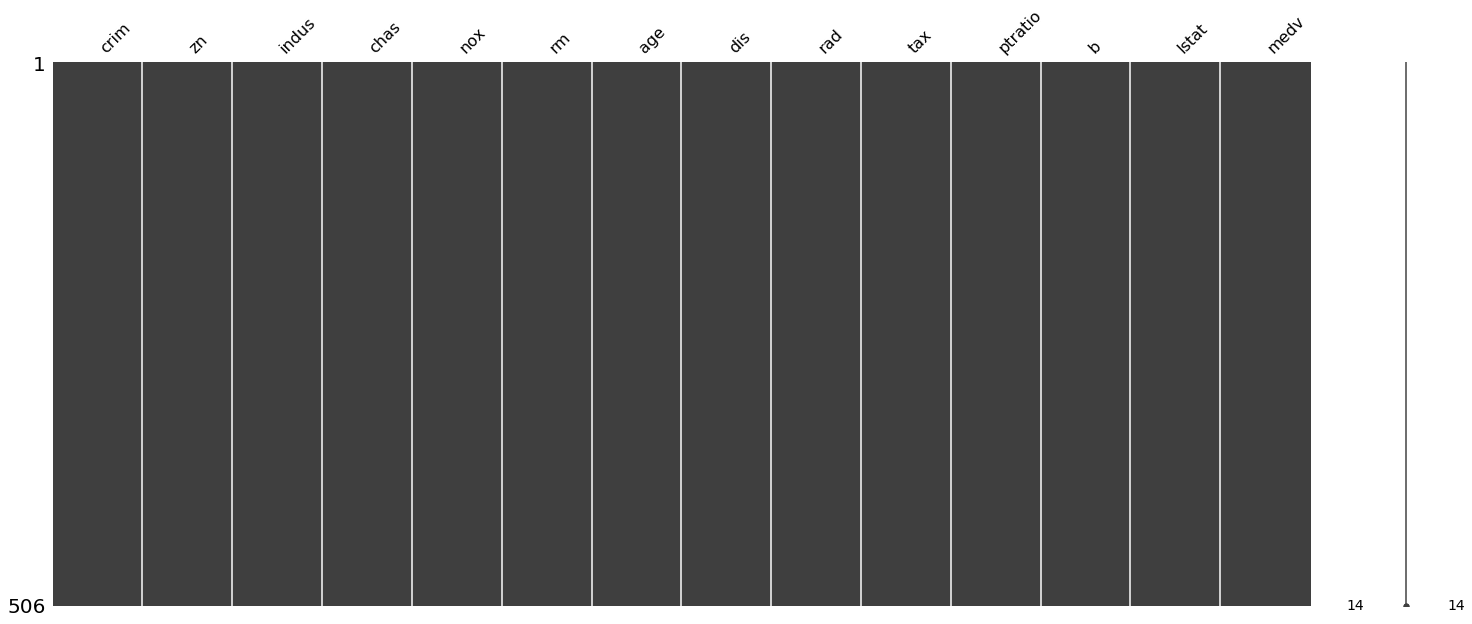

In [7]:
ms.matrix(data)

In [8]:
data.shape

(506, 14)

### Creating a dataframe for selected attributes

In [9]:
fdata=data[["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat"]]

In [10]:
print(fdata)

         crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
0     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2     0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5     0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
7     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8     0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9     0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10    0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
11    0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12    0.09378  12.5   7.8

In [11]:
print(fdata.shape)

(506, 13)


### Target values

In [12]:
odata=data['medv']

In [13]:
print(odata)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


In [14]:
print(odata.shape)

(506,)


## Training and testing

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(fdata,odata,test_size=0.30,random_state=101)

### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [19]:
clf = LinearRegression(normalize=True)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print(r2_score(Y_test,Y_pred))

0.7123963332666872
